## <center><h3>EXPLORATORY DATA ANALYSIS OF SECOND HAND CARS</h3></center>

## INTRODUCTION

This project aims to analyze a dataset of second-hand cars to extract meaningful insights and help potential buyers with different budgets or expectations make informed decisions. The dataset contains comprehensive information about various aspects of the cars, such as brand, model, the year of manufacture and other relevant features. 
<br>

Now, let's take a look at the variables and what they represent:

* Car_ID : A unique identifier for each car.
* Brand : The brand or the manufacturer of the car (e.g., Toyota, Honda, Ford, etc.).
* Model : The model of the car (e.g., Corolla, Civic, Mustang, etc.).
* Year : The year the car was manufactured.
* Kilometers_Driven : Total amount of the kilometers driven by the car.
* Fuel_Type : The type of fuel used the car uses (e.g., Petrol, Diesel).
* Transmission : The transmission type of the car (e.g., Manual, Automatic).
* Owner_Type : The number of previous owners (e.g., First, Second, Third).
* Mileage : The car's fuel efficiency, given in kilometers per liter.
* Engine : The engine capacity of the car in CC (Cubic Centimeters).
* Power : The car's maximum power output, measured in Brake Horsepower (bhp).
* Seats : The number of seats in the car.
* Price : The selling price of the car in Indian Rupees (INR). <br>

Link to the dataset used in this project : https://www.kaggle.com/datasets/sujithmandala/second-hand-car-price-prediction/data <br>

## CONTENT

1. [Data Collection](#section-1-data-collection)
2. [Data Cleaning](#section-2-data-cleaning)
3. [Data Type Checking](#section-3-data-type-checking)
4. [Column Analysis](#section-4-column-analysis)
5. [Statistical Analysis](#section-5-statistical-analysis)
6. [Data Visualization](#section-6-data-visualization)
7. [Correlation Matrix](#section-7-correlation-matrix)
8. [Lists of Best Car Options](#section-8-lists-of-best-car-options)

## <a id = "section-1-data-collection"></a> 1. DATA COLLECTION

In [48]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
df = pd.read_csv("cars.csv")

In [49]:
print("\n################# Column Names #########################")
print(df.columns)

# Creating a random sample to get an insight on the dataset
print("\n\n################# Sample ###################")
print(df.sample())

print("\n\n################# First 3 Rows ###################")
print(df.head(3))

print("\n\n################# Last 3 Rows ###################")
print(df.tail(3))

print("\n\n################# Number of Null Values #################")
print(df.isnull().sum())


################# Column Names #########################
Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')


################# Sample ###################
    Car_ID Brand Model  Year  Kilometers_Driven Fuel_Type Transmission  \
93      94  Audi    A5  2018              28000    Diesel    Automatic   

   Owner_Type  Mileage  Engine  Power  Seats    Price  
93      First       17    1968    187      5  2600000  


################# First 3 Rows ###################
   Car_ID   Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission  \
0       1  Toyota  Corolla  2018              50000    Petrol       Manual   
1       2   Honda    Civic  2019              40000    Petrol    Automatic   
2       3    Ford  Mustang  2017              20000    Petrol    Automatic   

  Owner_Type  Mileage  Engine  Power  Seats    Price  
0      First       15

As we can see above, none of the columns in our dataset contain any null values. This indicates that the dataset is complete and there are no missing entries that could affect the analysis. The records in the dataset seem to have the expected values across all columns. Although no anomalies or irregularities are detected, we should still check for duplicate rows. Also, since dataframe already has indexes for each record, "Car_ID" column is redundant and should be removed.

Even if dataset contains duplicate records, we wouldn't be able to identify them unless we delete the "Car_ID" column. Therefore, to identify and remove duplicates, we should first delete the "Car_ID" column. It is safe to delete "Car_ID" column since it does not hold important information.

<h2 id="section-2-data-cleaning"> 2. DATA CLEANING </h2>

In [50]:
#Removing Car_ID column
df = df.drop(columns=['Car_ID'])

#Checking records after deleting Car_ID column
print("\n################# First 3 Rows ###################")
print(df.head(3))
print("\n\n################# Last 3 Rows ###################")
print(df.tail(3))


# Checking if the dataset has any duplicate records
print("\n\n############# Number of Duplicated Rows ##############")
num_duplicates = df.duplicated().sum()
print(f"\t\t\t {num_duplicates}")

# Deleting duplicate records
df.drop_duplicates(inplace=True)
print("\n\n####### Number of Rows After Removing Duplicates ########")
print(f"\t\t\t {df.shape[0]}")


################# First 3 Rows ###################
    Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0  Toyota  Corolla  2018              50000    Petrol       Manual      First   
1   Honda    Civic  2019              40000    Petrol    Automatic     Second   
2    Ford  Mustang  2017              20000    Petrol    Automatic      First   

   Mileage  Engine  Power  Seats    Price  
0       15    1498    108      5   800000  
1       17    1597    140      5  1000000  
2       10    4951    395      4  2500000  


################# Last 3 Rows ###################
      Brand     Model  Year  Kilometers_Driven Fuel_Type Transmission  \
97     Ford  EcoSport  2018              26000    Petrol       Manual   
98  Hyundai     Verna  2019              24000    Petrol    Automatic   
99     Tata    Altroz  2020              18000    Petrol       Manual   

   Owner_Type  Mileage  Engine  Power  Seats   Price  
97      Third       18    1497    121      5  7

## <a id="section-3-data-type-checking"></a> 3. DATA TYPE CHECKING
After deleting Car_ID column and duplicate records, data appears to be accurate and reliable for further analysis.
We can observe that dataset has 61 rows and 12 columns. Meaning we have 61 cars and each car has 12 attributes. From the info() method, we can observe data types of each column. 5 columns contain object data type, while 7 columns contain integer data type. By comparing the output of the info() method with the expected data types of our dataset, we can confirm that all columns have the correct data types, so no type-conversions are needed.

In [51]:
print("##### Number of Rows, Number of Columns #####")
print(f"\t \t {df.shape}")
    
print("\n################# Info ######################")
df.info()

##### Number of Rows, Number of Columns #####
	 	 (61, 12)

################# Info ######################
<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              61 non-null     object
 1   Model              61 non-null     object
 2   Year               61 non-null     int64 
 3   Kilometers_Driven  61 non-null     int64 
 4   Fuel_Type          61 non-null     object
 5   Transmission       61 non-null     object
 6   Owner_Type         61 non-null     object
 7   Mileage            61 non-null     int64 
 8   Engine             61 non-null     int64 
 9   Power              61 non-null     int64 
 10  Seats              61 non-null     int64 
 11  Price              61 non-null     int64 
dtypes: int64(7), object(5)
memory usage: 6.2+ KB


## <a id="section-4-column-analysis"></a> 4. COLUMN ANALYSIS
We should take a closer look at the columns to indicate whether they are numerical, categorical or cardinal.

In [52]:
def column_detection(dataframe: pd.DataFrame, cat_threshold: int = 10, card_threshold: int = 20):
    """
    Function to classify columns as categorical, numerical, 
    numerical but categorical, and categorical but cardinal.
    
    Parameters:
    cat_threshold (int): The threshold for unique values below which numerical columns are considered categorical.
    card_threshold (int): The threshold for unique values above which categorical columns are considered cardinal.
    
    """
    
    # Columns which seem like numerical but are categorical
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_threshold and 
                   dataframe[col].dtype in ['int64', 'float64']]
    
    # Columns which seem like categorical but are cardinal
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > card_threshold and 
                   dataframe[col].dtype == 'object']
    
    # Categorical columns
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    # Numerical columns
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype in ['int64', 'float64']]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    

    print(f"Categorical columns:\n \t{cat_cols}\n")
    print(f"Numerical columns:\n \t{num_cols}\n")
    print(f"Columns that seem like numerical but are categorical:\n \t{num_but_cat}\n")
    print(f"Columns that seem like categorical but are cardinal:\n \t{cat_but_car}\n")
    
    print("Columns Overview")
    print(f"Number of categorical columns: {len(cat_cols)}")
    print(f"Number of numerical columns: {len(num_cols)}")
    print(f"Number of numerical but categorical columns: {len(num_but_cat)}")
    print(f"Number of categorical but cardinal columns: {len(cat_but_car)}")
    print(f"Number of records: {dataframe.shape[0]}")
    print(f"Number of columns: {dataframe.shape[1]}")
    
    return cat_cols, num_cols, num_but_cat, cat_but_car

In [53]:
cat_cols, num_cols, num_but_cat, cat_but_car = column_detection(df)

Categorical columns:
 	['Brand', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Year', 'Seats']

Numerical columns:
 	['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']

Columns that seem like numerical but are categorical:
 	['Year', 'Seats']

Columns that seem like categorical but are cardinal:
 	['Model']

Columns Overview
Number of categorical columns: 6
Number of numerical columns: 5
Number of numerical but categorical columns: 2
Number of categorical but cardinal columns: 1
Number of records: 61
Number of columns: 12


## <a id="section-5-statistical-analysis"> </a> 5. STATISTICAL ANALYSIS
Using describe() method, we can observe numerical columns. <br>
* The dataset contains cars manufactured between 2016 and 2021. <br>
* The most expensive car in this dataset costs 4 million INR, while the cheapest one costs 450 thousand INR.<br>
* The most powerful car has 396 bhp, while the least powerful one has 68 bhp. <br>
* The most cost-efficient car has a mileage value of 25 km/l. Which means it can take 25 kilometers with 1 liter fuel. <br>
* The highest engine capacity value is 4951 CC. Which represents a very strong engine, it is likely to be a luxury car.<br>

Numerical columns appears to have accurate values and are ready for data visualization. 

In [54]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,2018.344262,29081.967213,17.163934,1864.245902,157.934426,5.245902,1.557377e+06
std,1.181598,9767.795865,3.382210,662.234668,75.420127,0.767154,9.671193e+05
min,2016.000000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,2017.000000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,2018.000000,28000.000000,17.000000,1950.000000,148.000000,5.000000,1.300000e+06
75%,2019.000000,35000.000000,19.000000,1999.000000,187.000000,5.000000,2.500000e+06
max,2021.000000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


## <a id="section-6-data-visualization"></a> 6. DATA VISUALIZATON
* Visualizations play a crucial role in gaining insights and understanding our dataset in a more detailed way. Exploring relationships between these attributes helps us understand how each influences the others, particularly in terms of their impact on car prices.

* Following data visualizations, there are lists of best car options for different potential buyers.
*  Potential buyers can be classified into two main types based on their budgets and preferences:
    1.  Those who prioritize luxury cars or powerful engines with higher budgets
    2.  Those who are budget-conscious and prioritize affordability and high mileage. <br>

These preferences significantly influence car purchasing decisions. By classifying buyers into these categories, we can recommend suitable cars based on their specific needs and expectations.

### DISTRIBUTIONS
Examining the distributions of various attributes (such as brands, manifacture years, prices etc.) is crucial as it provides a clear understanding of the types of cars we are dealing with.

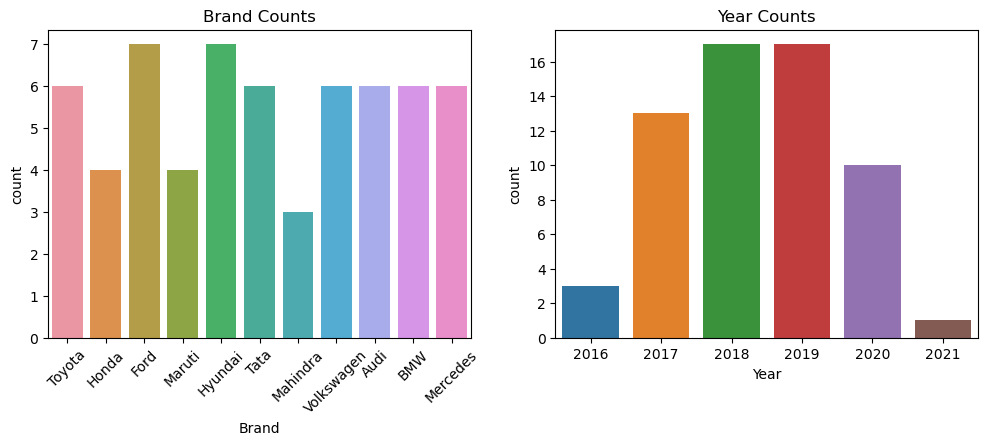

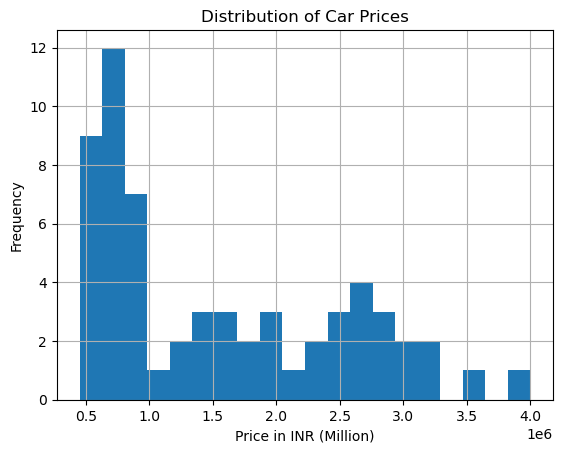

Text(0.5, 1.0, 'Number of Seats')

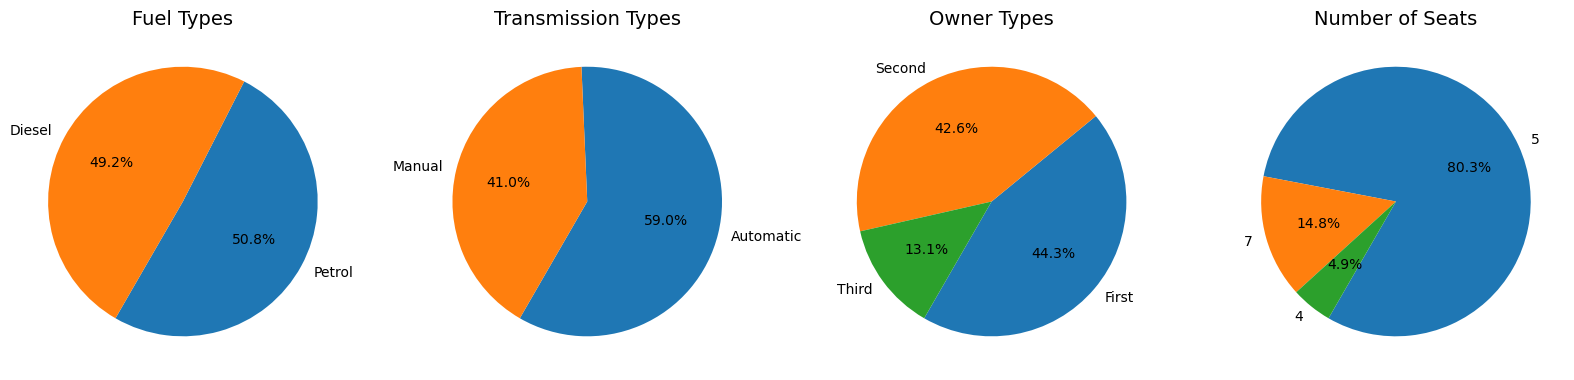

In [55]:
#Brand and Year Counts
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(x=df['Brand'], data=df)
plt.xticks(rotation=45)
plt.title('Brand Counts')

plt.subplot(1,2,2)
sns.countplot(x=df['Year'], data=df)
plt.title('Year Counts')
plt.show()

#Car Prices Distribution
df['Price'].hist(bins = 20)
plt.title('Distribution of Car Prices')
plt.xlabel('Price in INR (Million)')
plt.ylabel("Frequency")
plt.show(block=True)


#Distributions of Fuel Types, Transmission Types, Owner Types, Number of Seats
plt.figure(figsize = (20,10))

plt.subplot(1,4,1)
plt.pie(df['Fuel_Type'].value_counts(), labels=df['Fuel_Type'].value_counts().index,autopct='%1.1f%%', startangle=240)
plt.title("Fuel Types", fontsize=14)

plt.subplot(1,4,2)
plt.pie(df['Transmission'].value_counts(), labels=df['Transmission'].value_counts().index,autopct='%1.1f%%', startangle=240)
plt.title("Transmission Types", fontsize=14)

plt.subplot(1,4,3)
plt.pie(df['Owner_Type'].value_counts(), labels=df['Owner_Type'].value_counts().index,autopct='%1.1f%%', startangle=240)
plt.title("Owner Types", fontsize=14)

plt.subplot(1,4,4)
plt.pie(df['Seats'].value_counts(), labels=df['Seats'].value_counts().index,autopct='%1.1f%%', startangle=240)
plt.title("Number of Seats", fontsize=14)


### CAR PRICES OVER TIME
Analyzing average car prices over the years and average prices by transmission type over the years can provide valuable insights such as:
* Trend Analysis : It allows us to see if prices are generally increasing, decreasing, or remaining stable over time. This information is crucial for understanding trends in the automotive market, and making informed decisions about buying or selling cars.
* Segmentation by Transmission Type : Average prices categorized by transmission type (manual vs. automatic) reveal how transmission technology affects car prices. This helps potential buyers understand the price differences between different types of cars and decide which type fits their budget and preferences.

As we can see from the line charts below : <br>
* There are no automatic cars from 2021 in our dataset. <br>
* Average car prices change over the years, they are not steady.<br>
* There is a big drop in prices between 2019 and 2020, likely due to the impact of COVID-19. <br>
* Cars from 2020 are cheaper than those from any other year in our dataset. <br>
* Automatic cars are usually more expensive than manual ones.

Knowing these, we can suggest that budget-conscious buyers look for manual cars (unless they have a spesific preference) and cars from 2020 to find more affordable options.

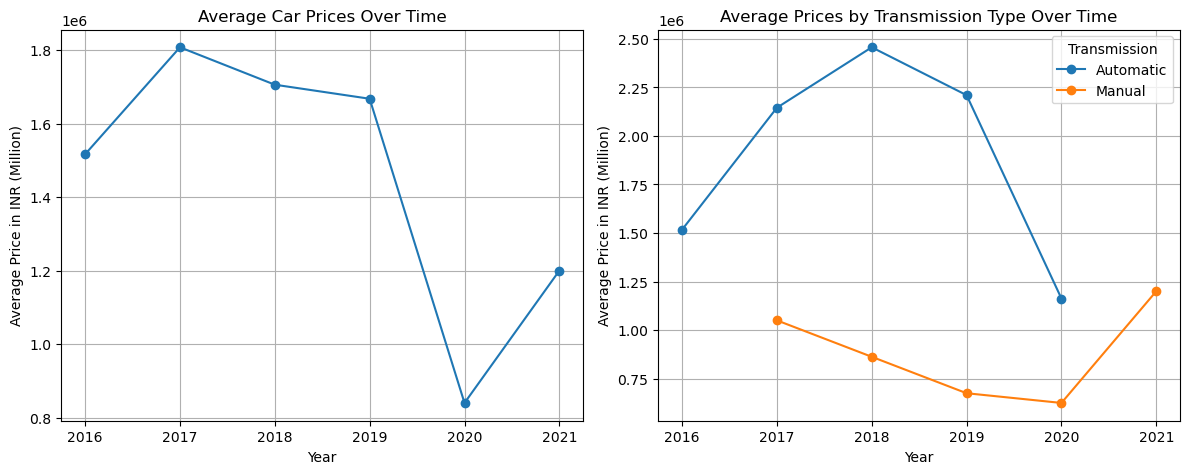

In [56]:
# Average car prices over the years
average_price_per_year = df.groupby('Year')['Price'].mean().reset_index()

# Average prices of both automatic and manual cars over the years
grouped = df.groupby(['Year', 'Transmission'])['Price'].mean().unstack()

fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 
# Plot 1: Average Car Prices Over Time
axes[0].plot(average_price_per_year['Year'], average_price_per_year['Price'], marker='o')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Price in INR (Million)')
axes[0].set_title('Average Car Prices Over Time')
axes[0].grid(True)

# Plot 2: Average Prices by Transmission Type Over Time
grouped.plot(kind='line', ax=axes[1], marker='o')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Price in INR (Million)')
axes[1].set_title('Average Prices by Transmission Type Over Time')
axes[1].grid(True)
axes[1].legend(title='Transmission')

plt.tight_layout()
plt.show()

### PRICE VS FUEL TYPE & PRICE VS TRANSMISSION TYPE

By checking the visualization below, it is safe to say that:
* Cars running on petrol are generally cheaper.
* Manual cars are significantly cheaper than automatic cars.
* There are some outliers in the data that reveal important information, so we have chosen to keep them rather than delete them. Outliers in both categories indicate some cars are priced significantly higher, possibly due to brand, model, or additional features.<br>

If a potential buyer is looking for a more affordable car, they should consider a manual car that runs on petrol. 

Text(0, 0.5, 'Price in INR (Million)')

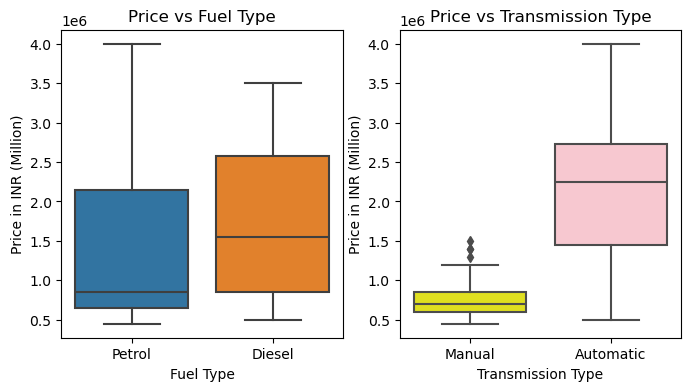

In [57]:
plt.figure(figsize = (8,4))
#box plot for "price by fuel type"
plt.subplot(1,2,1)
plt.title('Price vs Fuel Type')
sns.boxplot(data = df, x = 'Fuel_Type', y = 'Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price in INR (Million)')

#box plot for "price by transmission type"
colors = {'Manual': 'yellow', 'Automatic': 'pink'}
plt.subplot(1,2,2)
plt.title('Price vs Transmission Type')
sns.boxplot(data = df, x = 'Transmission', y = 'Price',palette=colors)
plt.xlabel('Transmission Type')
plt.ylabel('Price in INR (Million)')

### POWER VS FUEL TYPE & POWER VS TRANSMISSION TYPE
* It seems like both fuel types have the same intervals, meaning that besides outliers, they have the same scale size.
* The median line tells us that, generally, cars that run on diesel produce more power. However, there are outliers in petrol cars, indicating that some petrol cars in our dataset are very powerful. 

  
* Automatic cars generally produce more power than manual ones.
* Automatic cars have a wider scale of power values.
* Both manual and automatic cars have outliers.
  
Clearly, the most powerful cars in our dataset are automatic cars that run on petrol, considering the outliers in both plots.

Text(0, 0.5, 'Power (bhp)')

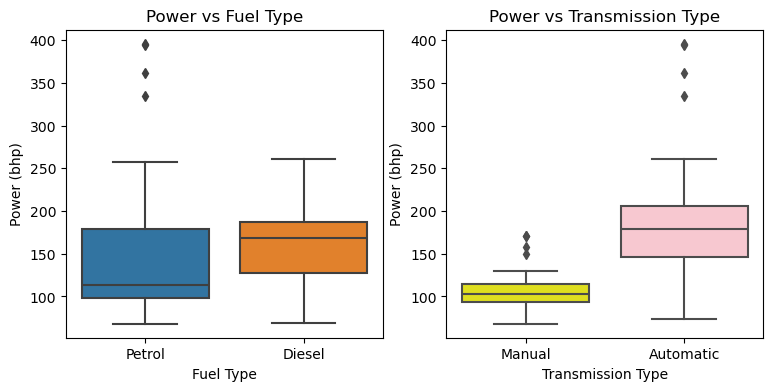

In [58]:
plt.figure(figsize = (9,4))
#box plot for "power values by fuel type"
plt.subplot(1,2,1)
plt.title('Power vs Fuel Type')
sns.boxplot(data = df, x = 'Fuel_Type', y = 'Power')
plt.xlabel('Fuel Type')
plt.ylabel('Power (bhp)')

#box plot for "power values by transmission type"
colors = {'Manual': 'yellow', 'Automatic': 'pink'}
plt.subplot(1,2,2)
plt.title('Power vs Transmission Type')
sns.boxplot(data = df, x = 'Transmission', y = 'Power',palette=colors)
plt.xlabel('Transmission Type')
plt.ylabel('Power (bhp)')

## <a id="section-7-correlation-matrix"> </a> 7. CORRELATION MATRIX
To better understand the relationship between engine capacity, power and fuel efficiency we should know that :
* The bigger an engine gets, the more power it can produce because it has a larger capacity to burn fuel and air. However, this increased power comes at the cost of higher fuel consumption. A larger engine requires more fuel to maintain its performance, leading to reduced fuel efficiency. Typically, cars with more power cost more because they have bigger engines or advanced features. The higher price reflects the extra technology and performance in these vehicles.
* On the other hand, a smaller engine has less capacity and therefore consumes less fuel. It is generally more budget-friendly. <br>

From the correlation matrix, we can observe :
* Power is highly positively correlated with engine and price.
* Mileage is highly negatively correlated with price and engine.
* Kilometers driven is barely correlated or isn't correlated at all with any of the other attributes.

<function matplotlib.pyplot.show(close=None, block=None)>

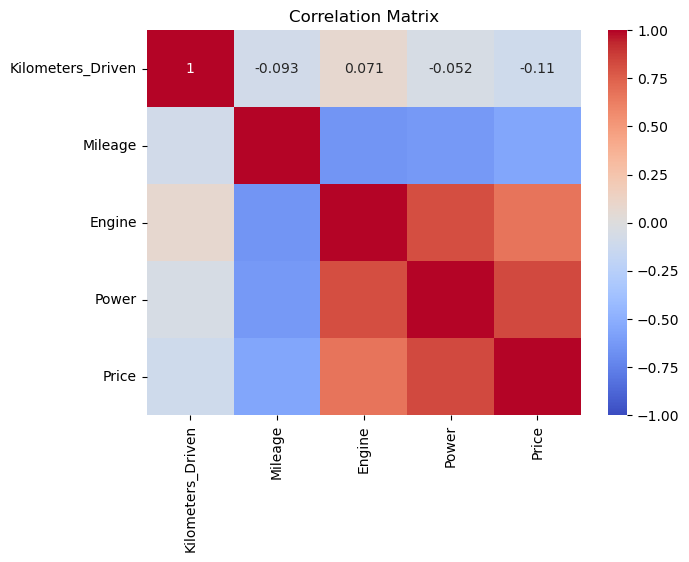

In [59]:
#Correlation Matrix
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show

## <a id="section-8-lists-of-best-car-options"> </a> 8. LISTS OF BEST CAR OPTIONS


#### A. The Most Powerful and High Performanced Cars:

* The top 5 cars with the highest BHP values and the top 5 cars with the highest engine capacity values are the same. This makes sense since the "Power" and "Engine" attributes are highly positively correlated.
* 4 of these powerful cars are automatic cars and run on petrol, as we predicted earlier.

In [60]:
print("\n\t\t Top 5 Powerful Cars \n")
top_power_cars = df.nlargest(5,'Power')
print(top_power_cars[['Brand', 'Model','Year', 'Fuel_Type', 'Transmission', 'Mileage', 'Engine', 'Power', 'Price' ]].to_string(index=False))


print("\n\t\t Top 5 Cars with Biggest Engines \n")
top_engine_cars = df.nlargest(5,'Engine')
print(top_power_cars[['Brand', 'Model','Year', 'Fuel_Type', 'Transmission', 'Mileage', 'Engine', 'Power', 'Price' ]].to_string(index=False))


		 Top 5 Powerful Cars 

   Brand    Model  Year Fuel_Type Transmission  Mileage  Engine  Power   Price
    Ford  Mustang  2019    Petrol    Automatic       13    2261    396 2700000
    Ford  Mustang  2017    Petrol    Automatic       10    4951    395 2500000
Mercedes      GLE  2018    Petrol    Automatic       12    2996    362 4000000
     BMW       X5  2018    Petrol    Automatic       14    2998    335 3200000
     BMW 7 Series  2019    Diesel    Automatic       15    2993    261 3500000

		 Top 5 Cars with Biggest Engines 

   Brand    Model  Year Fuel_Type Transmission  Mileage  Engine  Power   Price
    Ford  Mustang  2019    Petrol    Automatic       13    2261    396 2700000
    Ford  Mustang  2017    Petrol    Automatic       10    4951    395 2500000
Mercedes      GLE  2018    Petrol    Automatic       12    2996    362 4000000
     BMW       X5  2018    Petrol    Automatic       14    2998    335 3200000
     BMW 7 Series  2019    Diesel    Automatic       15    2993    

#### B. The Most Cost-Efficient Cars

In [61]:
print("\n\t\t Top 5 Cost-Efficient Cars \n")
top_mileage_cars = df.nlargest(5, 'Mileage')
print(top_mileage_cars[['Brand', 'Model','Year', 'Fuel_Type', 'Transmission', 'Mileage', 'Engine', 'Power', 'Price' ]].to_string(index=False))


		 Top 5 Cost-Efficient Cars 

  Brand Model  Year Fuel_Type Transmission  Mileage  Engine  Power  Price
  Honda  City  2017    Diesel       Manual       25    1498     98 650000
  Honda  WR-V  2018    Diesel       Manual       25    1498     98 750000
Hyundai Verna  2019    Diesel    Automatic       24    1582    126 850000
   Tata Tigor  2018    Diesel       Manual       24    1047     69 500000
 Maruti Swift  2020    Diesel       Manual       23    1248     74 600000


#### Bonus: The Cheapest Cars Grouped by Transmission and Fuel Type
Here are lists of the cheapest cars with different transmission and fuel types, prepared for potential buyers who have specific preferences.

In [62]:
# Creating a list to store the results
results = []

# Group by 'Transmission' and 'Fuel_Type'
grouped = df.groupby(['Transmission', 'Fuel_Type'])

# Iterate over each group
for (trans, fuel), group in grouped:
    # Get the 3 cheapest cars in each group
    cheapest_cars = group.nsmallest(5, 'Price')
    results.append((trans, fuel, cheapest_cars))

# Print the results
print("\nTop 5 Cheapest Cars by Transmission and Fuel Type:")
for trans, fuel, cars in results:
    print(f"\n{trans} - {fuel}")
    for i, row in cars.iterrows():
        print(f"    {row['Model']} - {row['Price']} INR")


Top 5 Cheapest Cars by Transmission and Fuel Type:

Automatic - Diesel
    Elantra - 800000 INR
    Sonata - 850000 INR
    Verna - 850000 INR
    Scorpio - 900000 INR
    Harrier - 1600000 INR

Automatic - Petrol
    Ameo - 500000 INR
    Polo - 650000 INR
    S-Cross - 700000 INR
    Verna - 850000 INR
    Civic - 1000000 INR

Manual - Diesel
    Tigor - 500000 INR
    Swift - 600000 INR
    City - 650000 INR
    XUV300 - 700000 INR
    WR-V - 750000 INR

Manual - Petrol
    Santro - 450000 INR
    Tiago - 500000 INR
    Figo - 550000 INR
    Venue - 550000 INR
    Altroz - 600000 INR
